# Proyecto 1 - Etapa 1

In [19]:
import pandas as pd
import nltk

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
import sklearn as sklearn
from joblib import dump, load

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stopwords-es')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paulinaarrazola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paulinaarrazola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading stopwords-es: Package 'stopwords-es' not
[nltk_data]     found in index
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paulinaarrazola/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. Carga de datos

In [21]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
news=pd.read_csv("./fake_news.csv", sep=";")
data= news.copy()

In [22]:
data.shape

(57063, 5)

In [23]:
data.sample(5)

,ID,Label,Titulo,Descripcion,Fecha
42023,ID,1,La Fiscalía pide 18 años para La Manada y rech...,El Tribunal Supremo acoge este viernes la vist...,21/06/2019
48604,ID,1,Sánchez dice a Guaidó que unas elecciones son ...,El presidente ha mantenido una conversación te...,24/01/2019
40210,ID,0,El BNG de Feijóo cede ante la presión del ala ...,No hemos hablado en ningún momento que el abor...,14/02/2023
47050,ID,0,Gabilondo: 'Quiero de Cifuentes un relato vero...,El portavoz socialista en la Asamblea de Madri...,03/04/2018
51753,ID,1,Una treintena de candidaturas optan a dirigir ...,Las elecciones que tendrán lugar entre el 12 y...,07/06/2020


#### JUSTIFICAR LO QUE PODEMOS VER Y LA INFORMACION QUE NOS ESTAN DANDOE ESTAS VISUALIZACIONES

# 2. Entendimiento de datos

In [24]:
data.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

no se hace .describe porque no tiene sentido en este caso porque como todos los datos son de categoricos menos el id no tiene sentido 

In [28]:
data.isnull().sum()

ID              0
Label           0
Titulo         16
Descripcion     0
Fecha           0
dtype: int64

aclarar que no se van a quitar porque no son descripciones y se pueden identificar con id

In [ ]:
#Saber cuantas de las noticias que tenemos son falsas. DESCRIBIR RESULTADOS
porcentajes = data['Label'].value_counts(normalize=True) * 100
print(porcentajes)

Label
1    58.107706
0    41.892294
Name: proportion, dtype: float64


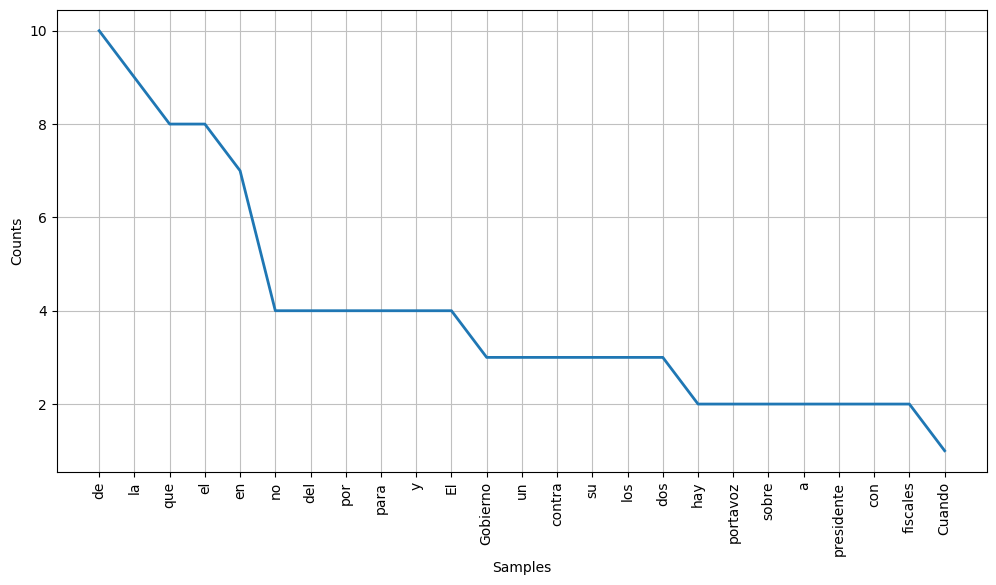

In [ ]:
from nltk.probability import FreqDist
import random
import matplotlib.pyplot as plt

# Select 5 random indices within the valid range
random_indices = random.sample(range(data.shape[0]), 5)
text = ' '.join(data['Descripcion'][i] for i in random_indices)

fdist = FreqDist(text.split())

plt.figure(figsize=(12, 6))  
fdist.plot(25, cumulative=False)
plt.show()


Se cogen 5 descripciones al azar para encontrar las palabras más comunes en estos pedazos y tener un primer entendimiento de las palabras más predominantes que podemos llegar a encontrar. MENCIONAR QUE MUCHAS SON PREPOSICIONES O ARTICULOS, ADEMAS DE QUE MUCHAS TIENEN QUE VER CON POLITICA (TODAVIA NO ANALIZAR POR QUE PUEDE SER ESTO)

In [40]:
data['Descripcion'].describe()

count                                                 57063
unique                                                49638
top       La Fundación En Acción ha participado con Públ...
freq                                                      7
Name: Descripcion, dtype: object

In [44]:
data.nunique()

ID                 1
Label              2
Titulo         51604
Descripcion    49638
Fecha           2271
dtype: int64

Resgistros totales: 57063
Registros unicos: 49638
13% de las descripciones registros son duplicados
Hay títulos que comparten la misma descripcion

# 3. Limpieza de datos 

Se eliminan los registros de las descripciones que estan repetidos porque el motor se puede confundir o puede aumentar el bias (explciar mejor por que). Se deja la primera ocurrencia. Se elimina duplicados por que no coinciden los duplicados entre columnas y hay algunas que si tiene sentido la duplicidad (la fecha)

In [ ]:
data = data.drop_duplicates(subset=['Descripcion'], keep='first')
#confirmamos que se hayan eliminado los duplicados
data.shape

(49638, 5)

# 4. Modelos

### 4.1 Random Forest (Paulina Arrázola)